#Conversión con Programación clasica/regular




In [105]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')

50° Celsius=  122.0 ° Fahrenheit 


*  pero y si no conocemos las reglas?
*  y si no es la logica es muy compleja o peor es muy variable?


#Conversión con IA 


##P1. importando librerias.

In [146]:
from google.colab import files
datos = files.upload()

Saving Celsius _ Fahrenheit.csv to Celsius _ Fahrenheit (10).csv


In [168]:
import tensorflow as tf
import numpy as np
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(datos['Celsius _ Fahrenheit.csv']), encoding='utf-8')
data.head(10)

,Celsius,Fahrenheit
0,-403,"-693,4"
1,-294,"-497,2"
2,-222,"-367,6"
3,-495,-859
4,140,284
5,-357,"-610,6"
6,-96,"-140,8"
7,-438,"-756,4"
8,218,"424,4"
9,127,"260,6"


##Definiendo los parametros de entrada y salida (capas)


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Celsius     499 non-null    int64 
 1   Fahrenheit  499 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [170]:
c = data.drop('Fahrenheit', axis=1)
f = data.drop('Celsius', axis=1)

In [171]:
c['Celsius'] = c['Celsius'].astype(float)

In [172]:
f = f['Fahrenheit'].replace(',', '.', regex=True).astype(float)

##P3. Creando la red neuronal

In [173]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

###P3.1 Compilamos la red


In [175]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

##P4.Entrenando

In [176]:
print("Comenzando entrenamiento...")
historial = modelo.fit(c, f, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


###P4.1 Resultados del entrenamiento

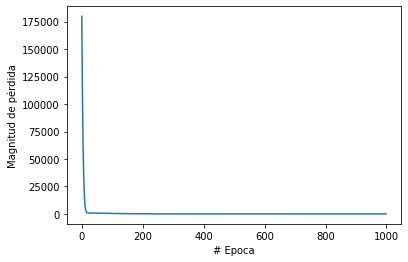

In [178]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
plt.show()

##P5. Haciendo una predicción

In [179]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[121.99978]] 
Regular:  122.0 
Dif %: [[0.00018311]]


##P6. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 




In [180]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.7999965]]
sesgo:  [31.999952]


##P7. Utilizando más capas

###P7.1 Creamos un modelo con dos capas ocultas

In [181]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [182]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [183]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo_v2.fit(c, f, epochs=1000, verbose=True)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 380025.9062
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 148327.5781
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 28619.0469
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 3091.5366
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 1785.1364
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 1102.3977
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 897.3101
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 857.5703
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 817.4317
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 784.9407
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 750.9626
Epoch 12/1000
16/16 [=========================

###P7.2 resultados del entrenamiento

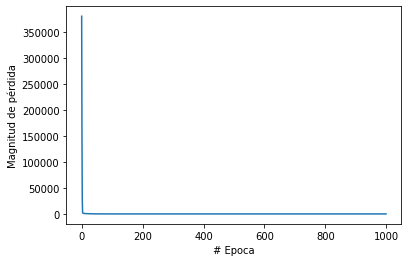

In [184]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])
plt.show()

###P7.3. conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 


In [185]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.8134687 , -0.87651414,  0.24034634]], dtype=float32), array([ 7.2385883, -7.0475736,  5.97727  ], dtype=float32)]
[array([[-1.3242686 , -0.31057316,  0.13564986],
       [ 1.3030883 ,  0.12341583, -0.12285804],
       [-0.99557304, -0.58885807, -0.63142097]], dtype=float32), array([-6.3692837, -5.2618217, -3.8918946], dtype=float32)]
[array([[-0.63224095],
       [-0.518576  ],
       [-0.22636442]], dtype=float32), array([4.8560915], dtype=float32)]


###P7.4. hagamos una predicción

In [187]:
v_celsius= 356
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  356 ° = Fahrenheit: 
IA:  [[672.79974]] 
Regular:  672.8000000000001 
Dif %: [[3.0517578e-05]]
